**Answer to Q1**  
We know that the resultant matrix from the multiplication will have $nm$ elements. We also know that each element in the resultant matrix is obtained by dot product of the vector represented by the row of the first matrix and the column of the second.  
Hence, for each element in the resultant matrix,  
There are *$k$ multiplications*,  
and *$k-1$ additions*.  

***Thus a total of $nmk$ multiplications and $nm(k-1)$ additions.***

---
**Answer to Q2**

In [ ]:
import numpy as np
import time

def mul(A,B):
    if (len(A[0]) != len(B)):
      return -1
    ans = []
    for i in range(len(A)):
        temp = []
        for j in range(len(B[0])):
            temp.append(0)
        ans.append(temp)
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                ans[i][j] += A[i][k]*B[k][j]
    return ans

def mul_numpy(A,B):
    ans = np.matmul(A,B)
    return ans

A = np.random.uniform(low=1, high=20, size=(15, 10))
B = np.random.uniform(low=1, high=20, size=(10, 5))
st_time = time.time()
C = mul(A,B)
ed_time = time.time()
t1 = ed_time-st_time
print("Matrix C:",C,"\nTime Taken:",t1,"\n-------------------------")
st_time = time.time()
C = mul_numpy(A,B)
ed_time = time.time()
t2 = ed_time-st_time
print("Matrix C:",C,"\nTime Taken:",t2)


Matrix C: [[1285.035074707661, 1091.8299005317656, 1568.4716616460169, 1277.8588922263425, 1330.6279576679176], [1196.9230922207275, 1040.285703171926, 1490.809242902919, 1199.459865572539, 1313.1571547849642], [1255.5334554170468, 987.7405239145564, 1278.9782807432537, 1144.7741794338335, 1166.4327635046943], [1108.712076114159, 933.8576224800831, 1152.9028796937469, 1068.7868387985109, 1259.027859940286], [1348.7072787453433, 1144.0211247563323, 1354.9245045192033, 1166.3054242401663, 1317.9210820119586], [1090.7350124579436, 1027.8694443209588, 1477.6704567921975, 1107.6186827841777, 1101.790361452366], [1290.0989682730292, 1150.4481379554627, 1588.8276947096692, 1414.5569318079113, 1517.9483034803377], [1180.9105045270076, 1056.3870256586351, 1358.8477466476152, 1030.135607548715, 1151.1801930242186], [1253.3010454119924, 1201.351526758581, 1426.5488462300088, 1379.5786222935303, 1475.6244207011694], [1014.0186981532493, 938.0991144053901, 1245.143104391595, 959.3077042070039, 1211

In the case of Numpy arrays and functions, the time taken is much less the time taken to multiply two matrixes when represented as a list of lists. This can be attributes to the following reasons:  
1) Numpy arrays are stored more effeciently that Python lists.  
2) Numpy also uses vectorized operations, that removes the need for loops and utilizes the resources of a mordern CPU to a greater extent.  
3) Numpy uses more optimized algorithms foe matrix multiplication and is implemented in fast languages like C, C++.  

---
**Answer to Q3**  
In the following code smippet, we are finding the median by finding the 1st largest number, 2nd largest number and so on. Each of these iterations take $O(n)$ operations, and there are $O(n/2)$ iterations in total. Hence, the time complexity of the algorithm given below is $O(n^2)$.  

In [ ]:
import numpy as np
import time

def argmax(arr):
  max = -float('inf')
  index = 0
  for i in range(len(arr)):
    if (arr[i] > max):
      max = arr[i]
      index = i
  return index

def median(arr):
  n = len(arr)
  temp = arr.copy()
  if (n%2 != 0):
    mid = n//2
    for i in range(mid+1):
      j = argmax(temp)
      val = temp[j]
      temp = list(temp[:j])+list(temp[j+1:])
    return val

  if (n%2 == 0):
    mid = n//2
    ans = 0
    for i in range(mid+1):
      j = argmax(temp)
      if (i == mid-1 or i == mid):
        ans += temp[j]
      temp = list(temp[:j])+list(temp[j+1:])
    return ans/2

array = []
for i in range(1000):
  num = np.random.randint(low=1, high=1000)
  if (num not in array):
    array.append(num)
np.random.shuffle(array)
print(array)
st = time.time()
print(median(array))
t1 = time.time() - st
print("Time taken using n//2 highest element: ", t1)
st = time.time()
print(np.median(array))
t2 = time.time() - st
print("Time taken using Numpy's median function: ", t2)

[918, 168, 764, 423, 551, 217, 853, 528, 313, 691, 705, 940, 416, 89, 495, 948, 345, 615, 960, 23, 651, 717, 895, 846, 332, 656, 905, 601, 712, 450, 181, 25, 159, 530, 602, 384, 328, 346, 840, 216, 968, 975, 548, 670, 807, 21, 597, 800, 872, 848, 429, 454, 389, 425, 664, 43, 640, 739, 879, 632, 472, 155, 607, 626, 138, 212, 158, 44, 277, 169, 199, 114, 406, 75, 759, 70, 299, 950, 325, 148, 120, 868, 978, 73, 820, 993, 833, 352, 61, 141, 699, 304, 335, 727, 187, 702, 234, 338, 809, 427, 502, 381, 579, 436, 441, 921, 733, 797, 559, 858, 130, 819, 65, 99, 343, 553, 888, 354, 531, 904, 104, 9, 459, 592, 498, 57, 369, 537, 182, 783, 818, 794, 228, 94, 402, 240, 969, 486, 289, 612, 278, 461, 195, 718, 894, 443, 72, 760, 752, 38, 813, 167, 573, 280, 51, 143, 52, 100, 348, 716, 413, 18, 574, 276, 34, 980, 596, 798, 405, 997, 769, 836, 420, 776, 953, 444, 7, 933, 506, 631, 351, 202, 731, 116, 327, 552, 197, 322, 578, 258, 986, 464, 430, 747, 751, 397, 368, 996, 367, 288, 884, 943, 544, 877, 493

We can see that Numpy's median function computes median much faster than $O(n^2)$.  
We can improve our algorithm by sorting the array and then returning the median ($O(nlogn)$) or perform even better by using median of medians approach ($O(n)$). The following code demonstraes the median of medians approach.

In [ ]:
def median_of_medians(array, i):
  n = len(array)
  arr = array.copy()
  listlets = [sorted(arr[j:j+5]) for j in range(0,n,5)]
  medians = [listlet[len(listlet)//2] for listlet in listlets]
  if (len(medians) <= 5):
    pivot = sorted(medians)[len(medians)//2]
  else:
    pivot = median_of_medians(medians, len(medians)//2)
  less = [j for j in arr if j < pivot]
  gr8 = [j for j in arr if j > pivot]
  m = len(less)
  if m == i:
    return pivot
  elif m > i:
    return median_of_medians(less,i)
  else:
    return median_of_medians(gr8,i-m-1)

def median_fast(array):
  n = len(array)
  if (n%2 == 0):
    a = median_of_medians(array,n//2-1)
    b = median_of_medians(array,n//2)
    return (a+b)/2
  else:
    return median_of_medians(array,n//2)

st = time.time()
print(median_fast(array))
t3 = time.time() - st
print("Time taken using median of medians: ", t3)


498
Time taken using median of medians:  0.005798816680908203


This matches very closely to the time taken by the median function from Numpy.

---  
**Answer to Q4**  
$f(x,y) = x^2y+y^3\sin(x)$  
$df/dx = 2xy + y^3(sin(x))$  
$df/dy = x^2 + 3(y^2)(sin(x))$  

gradient = $(df/dx)$\*xcap + $(df/dy)$\*ycap



---

**Answer to Q5**


In [ ]:
import jax
import jax.numpy as jnp

def f(x,y):
  return (x**2)*y + (y**3)*jnp.sin(x)

def dfdx(x,y):
  return (2*x*y) + (y**3)*jnp.cos(x)

def dfdy(x,y):
  return (x**2) + (3*(y**2))*jnp.sin(x)

key = jax.random.PRNGKey(0)
shape = (5,)
x = jax.random.normal(key,shape)
y = jax.random.normal(key,shape)
gradient = jax.grad(f,argnums=(0,1))
jax_grads = [list(gradient(x_val,y_val)) for x_val,y_val in zip(x,y)]

calc_grads = [[dfdx(x_val,y_val),dfdy(x_val,y_val)] for x_val,y_val in zip(x,y)]

print(jax_grads)
print(calc_grads)

[[Array(0.07708215, dtype=float32), Array(0.05505296, dtype=float32)], [Array(2.6947, dtype=float32), Array(-3.0912056, dtype=float32)], [Array(0.1277863, dtype=float32), Array(0.01445192, dtype=float32)], [Array(3.7365127, dtype=float32), Array(6.000433, dtype=float32)], [Array(0.13370764, dtype=float32), Array(0.10316297, dtype=float32)]]
[[Array(0.07708215, dtype=float32), Array(0.05505296, dtype=float32)], [Array(2.6947, dtype=float32), Array(-3.0912056, dtype=float32)], [Array(0.1277863, dtype=float32), Array(0.01445192, dtype=float32)], [Array(3.7365127, dtype=float32), Array(6.000433, dtype=float32)], [Array(0.13370764, dtype=float32), Array(0.10316297, dtype=float32)]]


The gradient for a point is stored as [x-component, y-component]  
We can see from the computed gradient values using jax and the manually differnetiated functions, that they are very similar and hence our computer gradient is verified.  



---


**Answer to Q6**


In [ ]:
import sympy

x,y = sympy.symbols('x y')
func = (x**2)*y + (y**3)*sympy.sin(x)

sympy_grads = [sympy.diff(func,x), sympy.diff(func,y)]

print("df/dx = ",sympy_grads[0], "\ndf/dy = ",sympy_grads[1])

df/dx =  2*x*y + y**3*cos(x) 
df/dy =  x**2 + 3*y**2*sin(x)


The partial derivatives shown by sympy match what we found out analytically for the solution to Q4.



---
**Answer to Q7**

In [ ]:
max_students = 10
subjects = 3
branches = 6
start_roll = 1
years = ['2022','2023','2024','2025']
record = dict()
for year in years:
  branches_dict = dict()
  for branch in range(1,branches+1):
    students_dict = dict()
    for roll in range(start_roll,max_students+1):
      students_dict[f'Roll Number {roll}'] = {'Name':f'stud{roll}', 'Marks':{'Maths':100,'English':90, 'Machine Learning':100}}
    branches_dict[f'Branch {branch}'] = students_dict
  record[str(year)] = branches_dict
print(record)

{'2022': {'Branch 1': {'Roll Number 1': {'Name': 'stud1', 'Marks': {'Maths': 100, 'English': 90, 'Machine Learning': 100}}, 'Roll Number 2': {'Name': 'stud2', 'Marks': {'Maths': 100, 'English': 90, 'Machine Learning': 100}}, 'Roll Number 3': {'Name': 'stud3', 'Marks': {'Maths': 100, 'English': 90, 'Machine Learning': 100}}, 'Roll Number 4': {'Name': 'stud4', 'Marks': {'Maths': 100, 'English': 90, 'Machine Learning': 100}}, 'Roll Number 5': {'Name': 'stud5', 'Marks': {'Maths': 100, 'English': 90, 'Machine Learning': 100}}, 'Roll Number 6': {'Name': 'stud6', 'Marks': {'Maths': 100, 'English': 90, 'Machine Learning': 100}}, 'Roll Number 7': {'Name': 'stud7', 'Marks': {'Maths': 100, 'English': 90, 'Machine Learning': 100}}, 'Roll Number 8': {'Name': 'stud8', 'Marks': {'Maths': 100, 'English': 90, 'Machine Learning': 100}}, 'Roll Number 9': {'Name': 'stud9', 'Marks': {'Maths': 100, 'English': 90, 'Machine Learning': 100}}, 'Roll Number 10': {'Name': 'stud10', 'Marks': {'Maths': 100, 'Englis



---

**Answer to Q8**

In [ ]:
class stud:
  def __init__(self,rollno,name,marks):
    self.rollno = rollno
    self.name = name
    self.marks = marks

  def append_marks(self,subject,marks):
    self.marks[subject] = marks

class branch:
  def __init__(self,name,students=[]):
    self.name = name
    self.students = students

  def append_stud(self,student):
    self.students.append(student)

class year:
  def __init__(self,name,branches=[]):
    self.name = name
    self.branches = branches

  def append_branch(self,branch):
    self.branches.append(branch)

stud1 = stud(1,'stud1',{'Maths':100,'English':90,'Machine Learning':100})
stud2 = stud(2,'stud2',{'Maths':100,'English':90,'Machine Learning':100})
stud3 = stud(3,'stud3',{'Maths':100,'English':90,'Machine Learning':100})
stud4 = stud(4,'stud4',{'Maths':100,'English':90,'Machine Learning':100})
stud5 = stud(5,'stud3',{'Maths':100,'English':90,'Machine Learning':100})
stud6 = stud(6,'stud4',{'Maths':100,'English':90,'Machine Learning':100})
branch11 = branch('Branch 1',[stud1,stud2])
branch12 = branch('Branch 2',[stud3,stud4])
branch21 = branch('Branch 1',[stud5,stud6])
year1 = year('2022',[branch11,branch12])
year2 = year('2022',[branch21,])
database = [year1,year2] # We can add more year objects, and add branches and students accordingly by using the methods defined in the class.
print(database)

[<__main__.year object at 0x7cce9d26cd30>, <__main__.year object at 0x7cce9d26e2f0>]




---


**Answer to Q9**

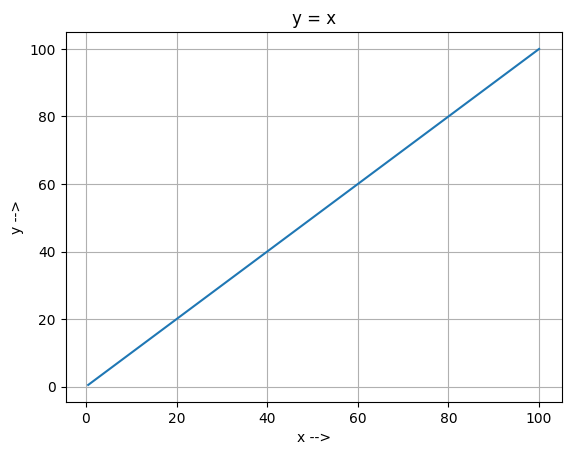

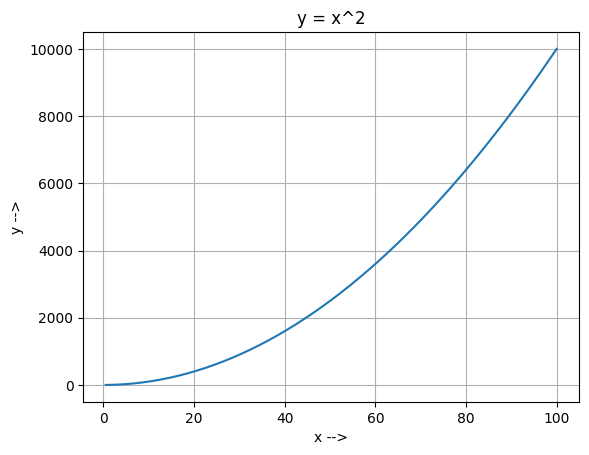

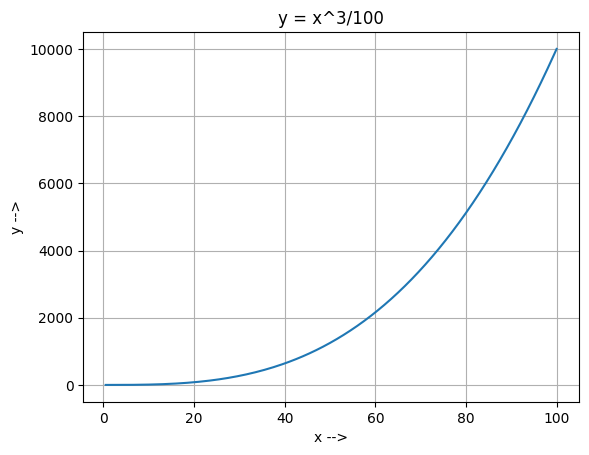

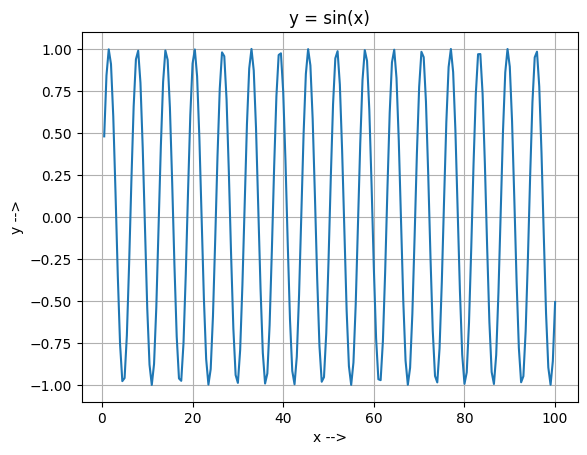

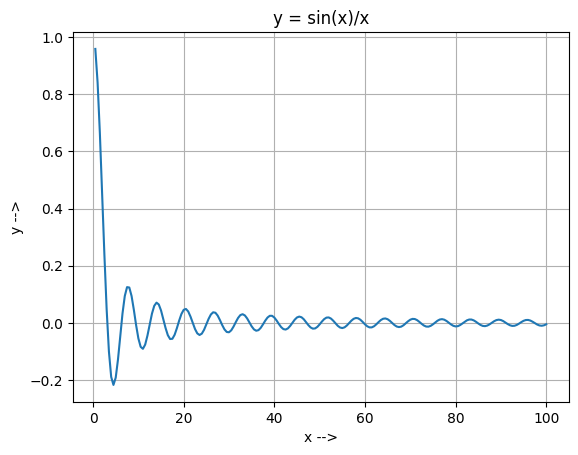

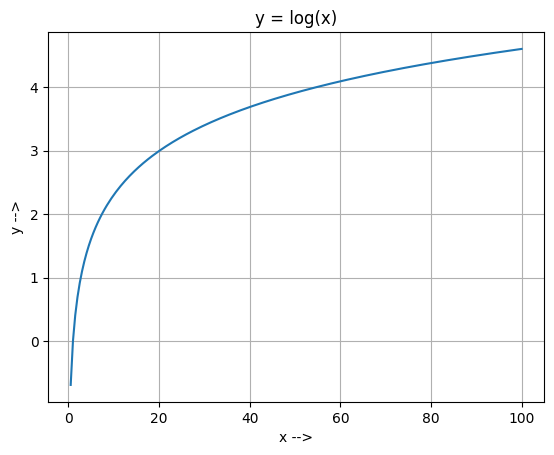

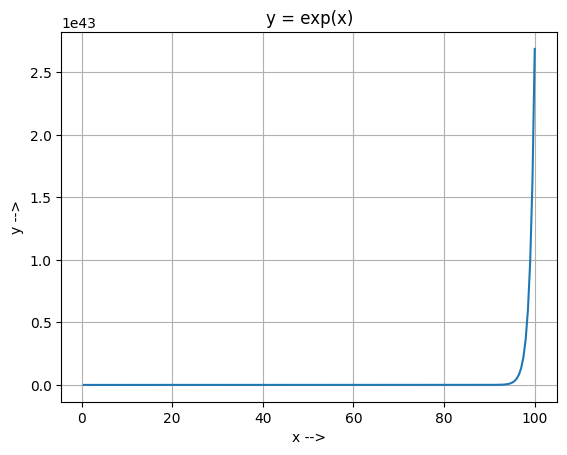

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def y1(x):
  return x

def y2(x):
  return x**2

def y3(x):
  return x**3/100

def y4(x):
  return np.sin(x)

def y5(x):
  return (np.sin(x))/x

def y6(x):
  return np.log(x)

def y7(x):
  return np.exp(x)

ys = [y1, y2, y3, y4, y5, y6, y7]
ytitles = ['y = x', 'y = x^2', 'y = x^3/100', 'y = sin(x)', 'y = sin(x)/x', 'y = log(x)', 'y = exp(x)']
x_vals = np.linspace(0.5,100,200)
for i in range(len(ys)):
  y_vals = ys[i](x_vals)
  plt.plot(x_vals, y_vals, label=ytitles[i])
  plt.xlabel('x -->')
  plt.ylabel('y -->')
  plt.title(ytitles[i])
  plt.grid(True)
  plt.show()



---



**Answer to Q10**  

Below is the program to make a $20 X 5$ pandas dataframe and change it's column name and find the column with the most standard deviation.

In [ ]:
import numpy as np
import pandas as pd


mat = np.random.uniform(low=1, high=2, size=(20, 5))
mat_df = pd.DataFrame(mat)
mat_df.columns = ['a','b','c','d','e']
max_dev = -1
column = 'd'
for col in ['a','b','c','d','e']:
  dev = np.std(mat_df[col])
  if (dev > max_dev):
    max_dev = dev
    column = col

print("Column with highest standard deviation: ", column)

Column with highest standard deviation:  e


Below is the program to calculate the row with the lowest mean.  

In [ ]:
min_mean = float('inf')
row = 0
row_sums = []
for ro in range(20):
  mean = 0
  for col in ['a','b','c','d','e']:
    mean += mat_df[col][ro]
  row_sums.append(mean)
  mean = mean/5
  if (mean < min_mean):
    min_mean = mean
    row = ro

print("Row with lowest mean: ", row)

Row with lowest mean:  9




---



**Answer to Q11**  
We use the row_sums calculated to find the mean in the above snippet to make the column 'f' below.

In [ ]:
mat_df['f'] = row_sums

Adding the new column 'g'

In [ ]:
g_col = []
for i in range(20):
  if (row_sums[i] < 8):
    g_col.append('LT8')
  else:
    g_col.append('GT8')
mat_df['g'] = g_col

In [ ]:
print(mat_df)

           a         b         c         d         e         f    g
0   1.694170  1.203091  1.686274  1.759606  1.925736  8.268878  GT8
1   1.823884  1.128379  1.438735  1.877495  1.355847  7.624340  LT8
2   1.659589  1.354206  1.713505  1.055350  1.750726  7.533376  LT8
3   1.162608  1.335766  1.329461  1.199619  1.988972  7.016425  LT8
4   1.617967  1.318899  1.485607  1.970886  1.928627  8.321986  GT8
5   1.408091  1.708362  1.243882  1.684737  1.977044  8.022117  GT8
6   1.417916  1.240608  1.689538  1.675683  1.744797  7.768542  LT8
7   1.338296  1.949791  1.868081  1.693845  1.029813  7.879825  LT8
8   1.633191  1.977734  1.064536  1.095255  1.938264  7.708981  LT8
9   1.245722  1.618560  1.046697  1.009175  1.531176  6.451330  LT8
10  1.445630  1.884813  1.804918  1.202514  1.139133  7.477008  LT8
11  1.462721  1.812722  1.410685  1.664965  1.482057  7.833149  LT8
12  1.495664  1.778823  1.929022  1.332540  1.556424  8.092474  GT8
13  1.470043  1.784295  1.761790  1.780549  1.69

Following code snippet counts the number of rows where the sum of values is less than 8.  

In [ ]:
num = len(mat_df[mat_df['g'] == 'LT8'])
print(num)

13


Following code snippet finds the standard deviation of the sums of the rows where the sum is greater than 8.  

In [ ]:
GT8_rows = mat_df[mat_df['g'] == 'GT8']
print(np.std(GT8_rows['f']))

0.21454788592928367


Following code snippet finds the standard deviation of the sums of the rows where the sum is less than 8.  

In [ ]:
LT8_rows = mat_df[mat_df['g'] == 'LT8']
print(np.std(LT8_rows['f']))

0.4293665041071099




---
**Answer to Q12**  
Numpy broadcasting refers to how numpy replicates certain input matrices to make it of a particular size to foster speedy vectorized computations. This allows numpy to skip looping and quickly perform calculations. Let's consider the operation of scalling a matrix as an example.  

Following code shows how a scalar is broadcasted.
Here the scalar is replicated and made into a $5 X 5 X 3$ matrix.

In [ ]:
import numpy as np

matrix = np.random.uniform(low=2,high=20,size=(5,5,3))
scalar = 2
print("Matrix previously: \n",matrix)
print("Scalled Matrix: \n", matrix*scalar)

Matrix previously: 
 [[[ 5.40377922 16.49874897  8.73951655]
  [10.61986553  5.48332297 19.90553833]
  [ 7.38378391 15.57770859 18.90815844]
  [17.96024686 13.85987504  9.87400862]
  [ 4.88471129 15.46420865 15.89052304]]

 [[18.63909804 18.37965451 14.94427754]
  [15.22769753  5.04819147  9.99671109]
  [10.43579321 17.32250817  3.88211533]
  [19.97444306  5.67135755 16.77116992]
  [16.61961755 14.9442977   9.52357455]]

 [[11.24807206 12.80843657 19.83053907]
  [ 7.21142483  8.28117366 12.45364156]
  [16.0644036  15.91617692 10.2426162 ]
  [ 4.52437797 15.78055395 14.27454909]
  [10.50493549 18.8389987  18.61020561]]

 [[18.96970303 17.65915229  8.31136927]
  [19.80407383 15.98752186 17.62617037]
  [15.65621044 16.76782253 16.69097227]
  [15.00709806  4.6560493  12.58757606]
  [16.94344571 14.12042692 11.69606822]]

 [[18.68831015  5.02883419 16.20565076]
  [ 6.21098343 19.53989957 10.63898407]
  [19.97023703 14.72926738  5.44965918]
  [ 4.04986381 19.74716587 12.56135511]
  [ 4.85939

We can do something similar with a another matrix instead of a scalar. However the new matrix needs to be broadcastable.

In [ ]:
matb = np.random.randint(2,9,size=(5,1))
print("new matrix: \n", matb)
print("Result: \n", matrix*matb)

new matrix: 
 [[7]
 [3]
 [8]
 [8]
 [8]]
Result: 
 [[[ 37.82645454 115.49124276  61.17661586]
  [ 31.85959658  16.44996891  59.716615  ]
  [ 59.07027129 124.62166875 151.26526755]
  [143.68197486 110.87900028  78.99206899]
  [ 39.07769033 123.71366922 127.12418432]]

 [[130.47368627 128.65758159 104.60994275]
  [ 45.68309259  15.1445744   29.99013327]
  [ 83.48634571 138.58006536  31.05692266]
  [159.79554448  45.37086043 134.16935935]
  [132.95694036 119.55438164  76.18859643]]

 [[ 78.73650443  89.65905601 138.8137735 ]
  [ 21.63427448  24.84352098  37.36092468]
  [128.51522879 127.32941539  81.94092956]
  [ 36.19502376 126.24443162 114.19639272]
  [ 84.03948388 150.71198964 148.88164485]]

 [[132.78792121 123.61406604  58.17958491]
  [ 59.4122215   47.96256559  52.87851111]
  [125.24968354 134.14258023 133.52777819]
  [120.0567845   37.24839441 100.70060849]
  [135.54756568 112.96341538  93.56854579]]

 [[130.81817106  35.20183933 113.43955533]
  [ 18.63295029  58.61969871  31.916952



---

**Answer to Q13**

In [ ]:
import numpy as np

def argmin(arr):
  min = float('inf')
  index = 0
  for i in range(len(arr)):
    if (arr[i] < min):
      min = arr[i]
      index = i
  return index

array = np.random.randint(0,100,20)
index1 = argmin(array)
index2 = np.argmin(array)
print(index1 == index2)
print("argmin = ",index1)
print(array)
print(array[index1])

True
argmin =  14
[43 48 68  6 16 77 26 49  5 73  9 60 44 95  3  8 31 71 40  8]
3
